# Análise Explorátoria 
Usamos os dados do dataset obtido no Kaggle: https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results

In [23]:
#Importar Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [24]:
#Importar base de dados

df = pd.read_csv("C:\Puc\db_musica_saude.csv")

In [25]:
#Retorna o número de linhas pelo número de colunas do meu conjunto de dados.

print(df.shape)

(736, 33)


In [26]:
#Retorna o tipo das colunas e a quantidade de valores não nulos que temos nelas.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [27]:
#Retorna o nome de todas as suas colunas no conjunto de dados.

print(df.columns)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [28]:
#Retorna as primeiras 5 linhas do meu conjunto de dados.

print(df.head())

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

In [29]:
#Descobrindo valores nulos

df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [30]:
# Exclundo a coluna Permissions


df = df.drop('Permissions', axis=1)

In [31]:
#Resume a contagem, média, desvio padrão, mínimo e máximo para variáveis numéricas. Estatistica Descritiva com as variaveis numericas 

df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


Age                 AxesSubplot(0.125,0.11;0.0945122x0.77)
Hours per day    AxesSubplot(0.238415,0.11;0.0945122x0.77)
BPM              AxesSubplot(0.351829,0.11;0.0945122x0.77)
Anxiety          AxesSubplot(0.465244,0.11;0.0945122x0.77)
Depression       AxesSubplot(0.578659,0.11;0.0945122x0.77)
Insomnia         AxesSubplot(0.692073,0.11;0.0945122x0.77)
OCD              AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

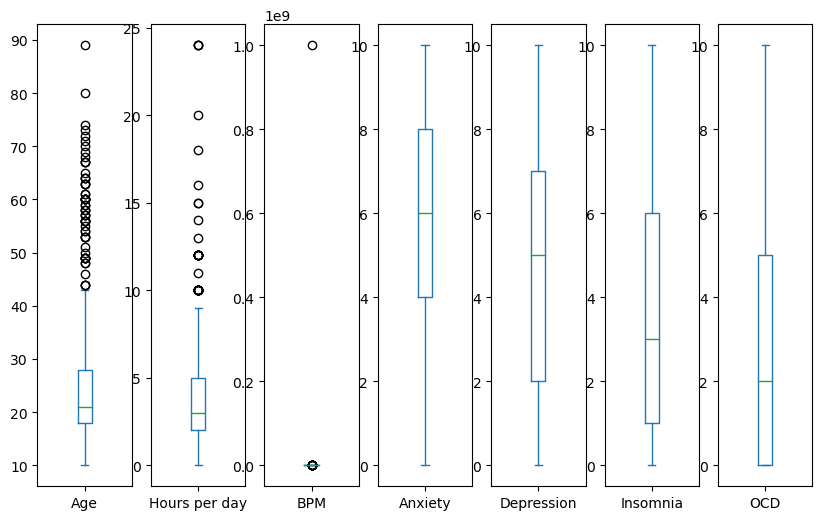

In [32]:
df.plot(kind='box', figsize=(10,6), subplots=True)

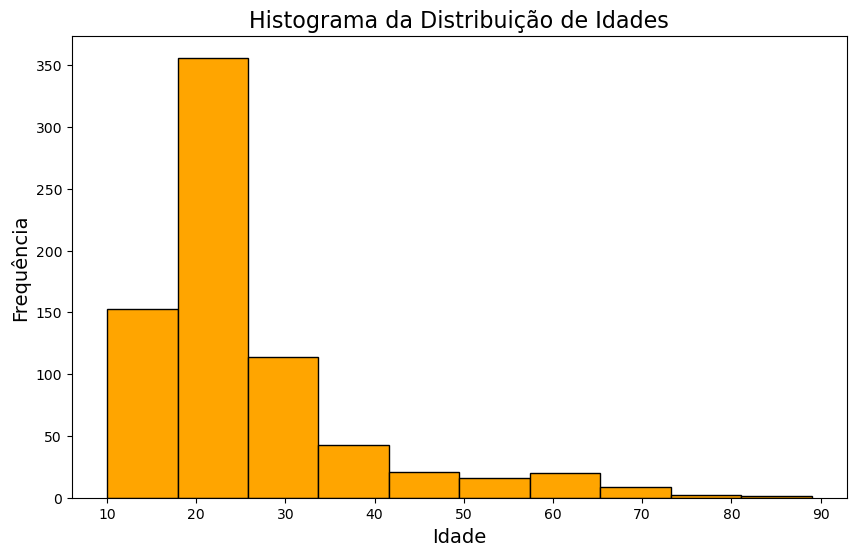

In [33]:
# Criar histograma da idade
plt.figure(figsize=(10, 6))  # Definir o tamanho da figura
plt.hist(df['Age'], bins=10, edgecolor='black', color='orange')  # Gerar histograma

# Adicionar título e rótulos aos eixos
plt.title('Histograma da Distribuição de Idades', fontsize=16)
plt.xlabel('Idade', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Exibir o gráfico
plt.show()


# Analisando os outliers

In [34]:
df[df['Age'] >= 40]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
1,8/27/2022 19:57:31,63.0,Pandora,1.50,Yes,No,No,Rock,Yes,No,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
3,8/27/2022 21:40:40,61.0,YouTube Music,2.50,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
57,8/28/2022 13:08:24,42.0,I do not use a streaming service.,0.00,NaN,No,No,Rock,No,Yes,...,Rarely,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,No effect
68,8/28/2022 13:55:45,41.0,Apple Music,3.00,Yes,Yes,Yes,Metal,Yes,Yes,...,Sometimes,Never,Rarely,Rarely,Never,10.0,7.0,8.0,0.0,Improve
91,8/28/2022 14:47:08,43.0,I do not use a streaming service.,6.00,Yes,Yes,Yes,Video game music,Yes,Yes,...,Sometimes,Rarely,Never,Sometimes,Very frequently,5.0,4.0,8.0,3.0,No effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,9/12/2022 19:41:23,42.0,Spotify,2.00,Yes,No,No,Metal,Yes,Yes,...,Very frequently,Sometimes,Never,Very frequently,Very frequently,7.0,8.0,5.0,3.0,Improve
643,9/13/2022 0:48:14,42.0,Other streaming service,0.25,No,Yes,No,Classical,Yes,Yes,...,Sometimes,Rarely,Rarely,Sometimes,Never,7.0,9.0,4.0,5.0,Improve
654,9/13/2022 11:16:37,43.0,I do not use a streaming service.,0.00,No,No,No,Rock,No,No,...,Sometimes,Rarely,Rarely,Sometimes,Never,1.0,2.0,2.0,0.0,No effect
695,9/28/2022 17:25:48,89.0,Spotify,24.00,Yes,Yes,Yes,Rap,No,No,...,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect


In [35]:
df[df['Hours per day'] >= 8]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
11,8/27/2022 23:00:32,19.0,YouTube Music,8.0,Yes,No,No,EDM,Yes,No,...,Rarely,Rarely,Sometimes,Rarely,Rarely,1.0,0.0,0.0,1.0,Improve
16,8/27/2022 23:39:41,16.0,Spotify,8.0,Yes,No,No,Hip hop,Yes,Yes,...,Never,Sometimes,Very frequently,Never,Rarely,8.0,8.0,4.0,3.0,Improve
17,8/27/2022 23:39:49,16.0,Spotify,12.0,Yes,No,Yes,Hip hop,Yes,Yes,...,Sometimes,Rarely,Sometimes,Very frequently,Never,5.0,7.0,10.0,0.0,Improve
18,8/27/2022 23:40:55,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,...,Rarely,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve
20,8/27/2022 23:43:06,15.0,Apple Music,8.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Rarely,Very frequently,Sometimes,Sometimes,6.0,9.0,3.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,9/28/2022 17:25:48,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,...,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect
699,10/3/2022 9:30:19,16.0,Spotify,9.0,Yes,No,No,Metal,No,Yes,...,Sometimes,Rarely,Rarely,Very frequently,Never,10.0,10.0,10.0,8.0,Improve
710,10/4/2022 4:50:49,16.0,Spotify,8.0,Yes,Yes,Yes,Rock,Yes,No,...,Sometimes,Rarely,Never,Very frequently,Sometimes,8.0,9.0,5.0,10.0,Improve
713,10/4/2022 14:50:28,17.0,YouTube Music,8.0,Yes,No,No,Pop,Yes,Yes,...,Very frequently,Never,Rarely,Rarely,Very frequently,5.0,2.0,4.0,7.0,No effect


# Correlação de Pearson entre a variável "Hours per day" e as variáveis de saúde mental (Anxiety, Depression, etc.):

Hours per day    float64
Anxiety          float64
Depression       float64
Insomnia         float64
OCD              float64
dtype: object
Correlação de Pearson:
 - "Hours per day" vs Anxiety: Corr = 0.049, p-valor = 0.181
 - "Hours per day" vs Depression: Corr = 0.111, p-valor = 0.003
 - "Hours per day" vs Insomnia: Corr = 0.142, p-valor = 0.000
 - "Hours per day" vs OCD: Corr = 0.119, p-valor = 0.001


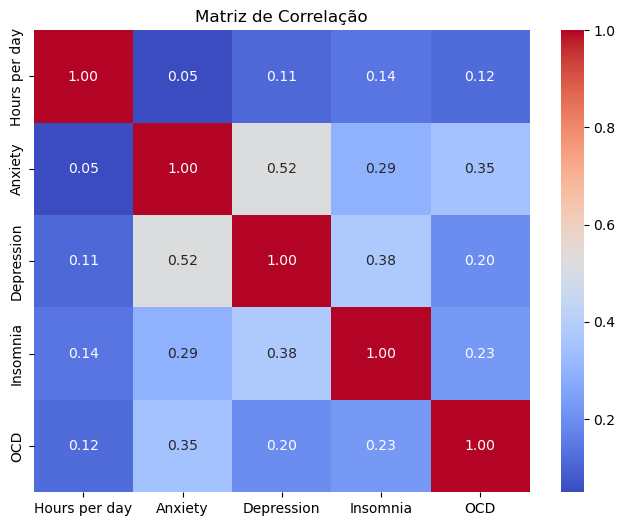

In [36]:

# Selecionar colunas de interesse
health_vars = ['Anxiety', 'Depression', 'Insomnia','OCD']
df_clean = df[['Hours per day'] + health_vars].dropna()

# Verificar tipos de dados
print(df_clean.dtypes)

# Análise de Correlação de Pearson
print("Correlação de Pearson:")
for var in health_vars:
    corr, p_value = pearsonr(df_clean['Hours per day'], df_clean[var])
    print(f' - "Hours per day" vs {var}: Corr = {corr:.3f}, p-valor = {p_value:.3f}')

# Visualizar a matriz de correlação
corr_matrix = df_clean[['Hours per day'] + health_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()




# Tabela de Frequência

In [37]:
# Contar a frequência absoluta de cada gênero musical
freq_absoluta = df['Fav genre'].value_counts()

# Calcular a frequência relativa
freq_relativa = df['Fav genre'].value_counts(normalize=True)

# Calcular a frequência acumulada
freq_acumulada = freq_relativa.cumsum()

# Criar uma tabela consolidada
tabela_frequencia = pd.DataFrame({
    'Frequência Absoluta': freq_absoluta,
    'Frequência Relativa (%)': freq_relativa * 100,
    'Frequência Acumulada (%)': freq_acumulada * 100
})

# Exibir a tabela de frequência
tabela_frequencia


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Rock,188,25.543478,25.543478
Pop,114,15.489130,41.032609
Metal,88,11.956522,52.989130
Classical,53,7.201087,60.190217
Video game music,44,5.978261,66.168478
EDM,37,5.027174,71.195652
R&B,35,4.755435,75.951087
Hip hop,35,4.755435,80.706522
Folk,30,4.076087,84.782609
K pop,26,3.532609,88.315217


In [38]:
# Filtrar colunas relacionadas a frequências musicais

musical_styles_columns = [col for col in df.columns if col.startswith('Frequency')]


In [39]:
def calculate_frequencies(data, column):
    
    # Frequência absoluta
    abs_freq = data[column].value_counts().sort_index()
    
    # Frequência relativa
    rel_freq = (abs_freq / abs_freq.sum()) * 100
    
    # Frequência acumulada
    cum_freq = abs_freq.cumsum()
    
    # Montar DataFrame final
    freq_table = pd.DataFrame({
        'Frequência Absoluta': abs_freq,
        'Frequência Relativa (%)': rel_freq,
        'Frequência Acumulada': cum_freq
    })
    
    return freq_table


# Tabela de Frequencia para o estilo musical Classical

In [40]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Classical]']


,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,169,22.961957,169
Rarely,259,35.190217,428
Sometimes,200,27.173913,628
Very frequently,108,14.673913,736


# Tabela de Frequencia para o estilo musical Country

In [41]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Country]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,343,46.603261,343
Rarely,233,31.657609,576
Sometimes,111,15.081522,687
Very frequently,49,6.657609,736


# Tabela de Frequencia para o estilo musical EDM

In [43]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [EDM]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,307,41.711957,307
Rarely,194,26.358696,501
Sometimes,146,19.836957,647
Very frequently,89,12.092391,736


# Tabela de Frequencia para o estilo musical Folk

In [44]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Folk]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,292,39.673913,292
Rarely,221,30.027174,513
Sometimes,145,19.701087,658
Very frequently,78,10.597826,736


In [ ]:
# Tabela de Frequencia para o estilo musical Gospel

In [45]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Gospel]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,535,72.690217,535
Rarely,135,18.342391,670
Sometimes,52,7.065217,722
Very frequently,14,1.902174,736


# Tabela de Frequencia para o estilo musical Hip hop

In [47]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Hip hop]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,181,24.592391,181
Rarely,214,29.076087,395
Sometimes,218,29.619565,613
Very frequently,123,16.711957,736


# Tabela de Frequencia para o estilo musical Jazz

In [48]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Jazz]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,261,35.461957,261
Rarely,247,33.559783,508
Sometimes,175,23.777174,683
Very frequently,53,7.201087,736


# Tabela de Frequencia para o estilo musical K pop

In [49]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [K pop]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,416,56.521739,416
Rarely,176,23.913043,592
Sometimes,67,9.103261,659
Very frequently,77,10.461957,736


# Tabela de Frequencia para o estilo musical Latin

In [50]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Latin]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,443,60.190217,443
Rarely,172,23.369565,615
Sometimes,88,11.956522,703
Very frequently,33,4.483696,736


In [ ]:
# Tabela de Frequencia para o estilo musical Lofi

In [52]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Lofi]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,280,38.043478,280
Rarely,211,28.668478,491
Sometimes,160,21.739130,651
Very frequently,85,11.548913,736


# Tabela de Frequencia para o estilo musical Metal

In [53]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Metal]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,264,35.869565,264
Rarely,192,26.086957,456
Sometimes,134,18.206522,590
Very frequently,146,19.836957,736


# Tabela de Frequencia para o estilo musical Pop

In [54]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Pop]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,56,7.608696,56
Rarely,142,19.293478,198
Sometimes,261,35.461957,459
Very frequently,277,37.635870,736


# Tabela de Frequencia para o estilo musical R&B

In [55]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [R&B]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,225,30.570652,225
Rarely,211,28.668478,436
Sometimes,184,25.000000,620
Very frequently,116,15.760870,736


In [ ]:
# Tabela de Frequencia para o estilo musical Rap

In [56]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Rap]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,200,27.173913,200
Rarely,215,29.211957,415
Sometimes,195,26.494565,610
Very frequently,126,17.119565,736


# Tabela de Frequencia para o estilo musical Rock

In [ ]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Rock]']

# Tabela de Frequencia para o estilo musical Video game music

In [57]:
# Dicionário para armazenar as tabelas de frequência de cada estilo
frequencies_dict = {}

# Gerar a tabela para cada estilo musical
for style in musical_styles_columns:
    frequencies_dict[style] = calculate_frequencies(df, style)

# Exibir a tabela de frequência para um estilo musical específico (por exemplo, "Classical")
frequencies_dict['Frequency [Video game music]']

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
Never,236,32.065217,236
Rarely,197,26.766304,433
Sometimes,186,25.271739,619
Very frequently,117,15.896739,736


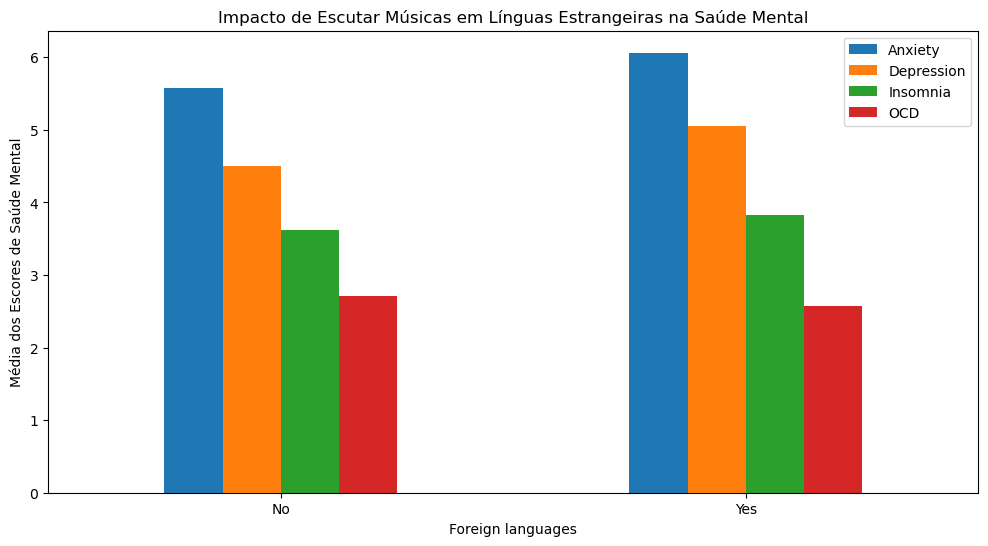

In [82]:
# Agrupar por quem escuta músicas em línguas estrangeiras e calcular a média de escores de saúde mental
foreign_language_impact = df.groupby('Foreign languages')[mental_health_cols].mean()

# Plotar gráfico de barras
foreign_language_impact.plot(kind='bar', figsize=(12, 6))
plt.title('Impacto de Escutar Músicas em Línguas Estrangeiras na Saúde Mental')
plt.ylabel('Média dos Escores de Saúde Mental')
plt.xticks(rotation=0)
plt.show()


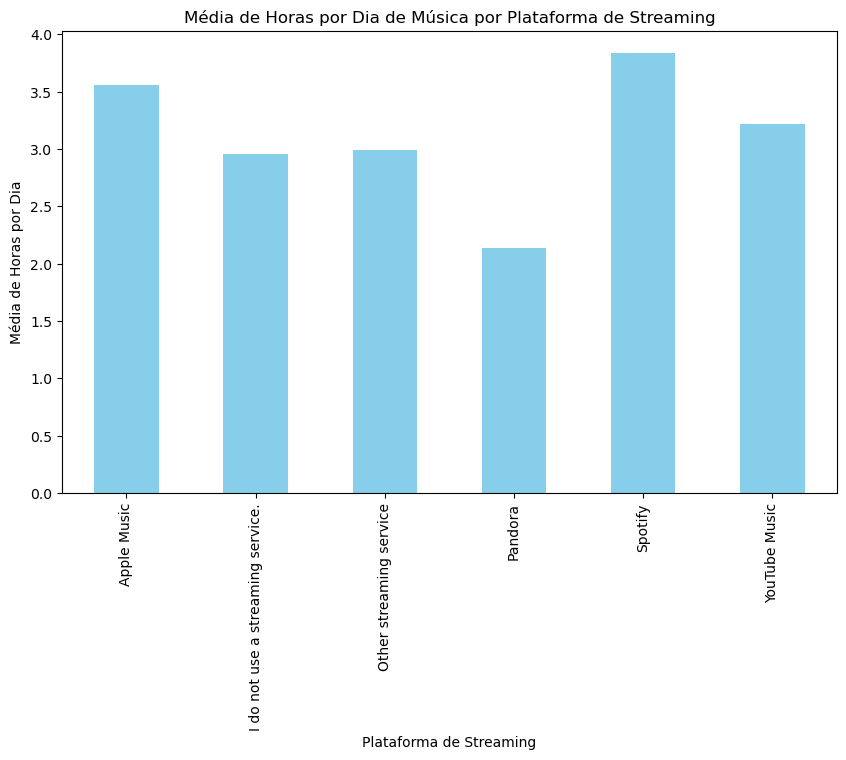

In [89]:
# Agrupar por plataforma de streaming e calcular a média de horas por dia
streaming_hours = df.groupby('Primary streaming service')['Hours per day'].mean()

# Plotar gráfico de barras
streaming_hours.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Média de Horas por Dia de Música por Plataforma de Streaming')
plt.ylabel('Média de Horas por Dia')
plt.xlabel('Plataforma de Streaming')
plt.show()



